In [1]:
%matplotlib widget
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.stats import multivariate_normal


def updatexy(xval,yval,x,y,z):
    # x and y are mgrids
    # z holds the histogram at each (x,y) point
    # xval and yval are scalars that represent x-y coordinates
    # increment x and y by 1, in the location (xval, yval)
    xmin = x[0,0]
    ymin = y[0,0]
    xinc = x[1,0]-x[0,0]
    yinc = y[0,1]-y[0,0]
    xmax = x[-1,-1]
    ymax = y[-1,-1]
    if xval<xmin or xval>=xmax+xinc or yval<ymin or yval>=ymax+yinc:
        return(-1) # error
    ix = 0
    for i in range(x.shape[0]):
        if xval<x[i,0]:
            break
        ix += 1
    ix -= 1
    iy = 0
    for j in range(y.shape[1]):
        if yval<y[0,j]:
            break
        iy += 1
    iy -= 1
    # print(ix,iy)
    z[ix,iy] += 1
    return(0)

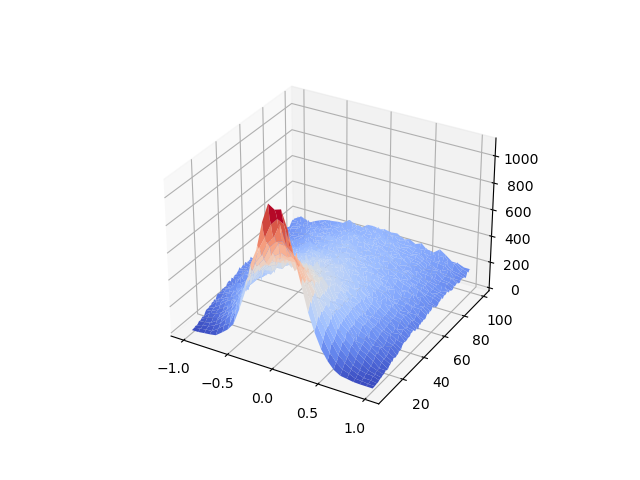

In [11]:
# basic Brownian motion

tmax = 100
stdev = 0.1

X = np.zeros(10000)
xgrid, tgrid = np.mgrid[-1:1:30j, 5:tmax]
zgrid = np.zeros(xgrid.shape)

for tt in range(tmax):
    X += np.random.normal(scale=stdev, size=X.size)
    for xx in X:
        updatexy(xx,tt,xgrid,tgrid,zgrid)
    

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# plot surface vs wireframe
l = ax.plot_surface(xgrid,tgrid,zgrid,  linewidth=0,cmap='coolwarm')

plt.show()


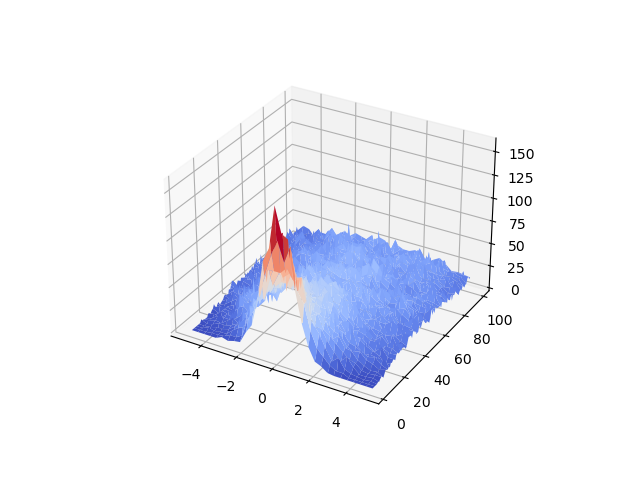

In [78]:
# Brownian motion with only non-hitting paths

nsamples = 1000
tmax = 100
stdev = 0.5

a = 0.2 
# this is the limit on x for "hitting"
# can see that the density function smoothly approaches zero as x approaches a
xgrid, tgrid = np.mgrid[-5:5:30j, 3:tmax]
zgrid = np.zeros(xgrid.shape)


X = np.zeros(nsamples*tmax).reshape((nsamples,tmax))
for j in range(1,tmax):
    X[:,j] = X[:,j-1] + np.random.normal(scale=stdev,size=nsamples)
Xnohit = np.zeros((1,tmax)) # samples that have not hit
Xhit = np.zeros((1,tmax)) # samples that have hit

for traj in X:
    if traj[traj>=a].size>0:
        Xhit = np.append(Xhit,traj.reshape((1,traj.size)),axis=0)
    else:
        Xnohit = np.append(Xnohit,traj.reshape((1,traj.size)),axis=0)


for tt in range(tmax):    
    for xx in Xhit[:,tt]:
        updatexy(xx,tt,xgrid,tgrid,zgrid)
    

fig, ax = plt.subplots(subplot_kw={'projection': '3d'})

# plot surface vs wireframe
l = ax.plot_surface(xgrid,tgrid,zgrid,  linewidth=0,cmap='coolwarm')

plt.show()


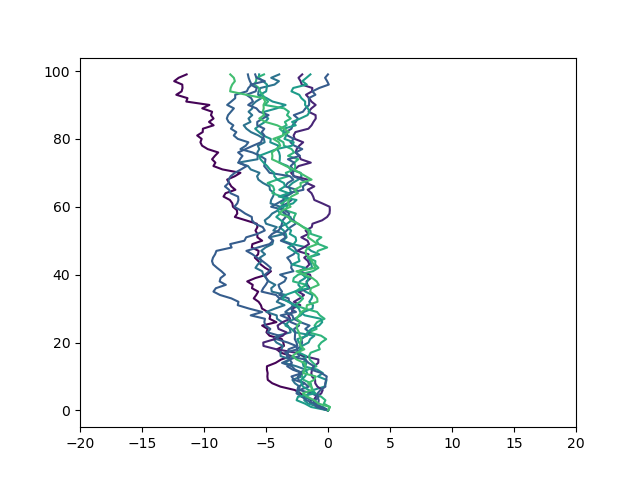

In [98]:
cmap = plt.get_cmap('viridis')

fig2, ax2 = plt.subplots()
ax2.set_xlim([-20,20])
y = [i for i in range(Xhit[5].size)]
for i in range(40,50):
    plt.plot(Xnohit[i],y, color=cmap(np.random.random()))

plt.show()


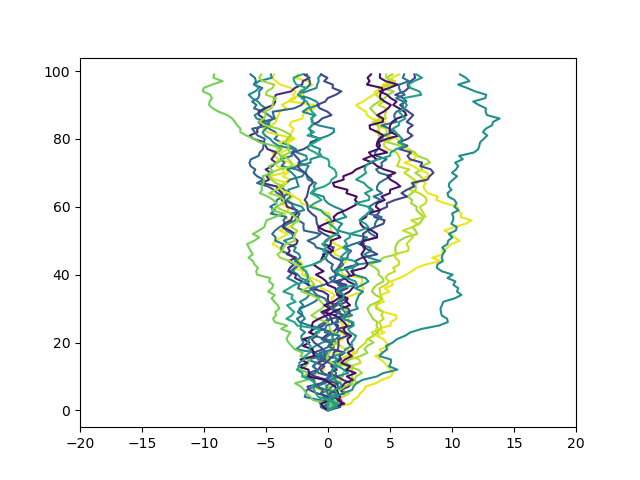

In [99]:
fig2, ax2 = plt.subplots()
y = [i for i in range(Xnohit[5].size)]
ax2.set_xlim([-20,20])
for i in range(30,50):
    plt.plot(Xhit[i],y, color=cmap(np.random.random()))

plt.show()
